# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [3,4]].values

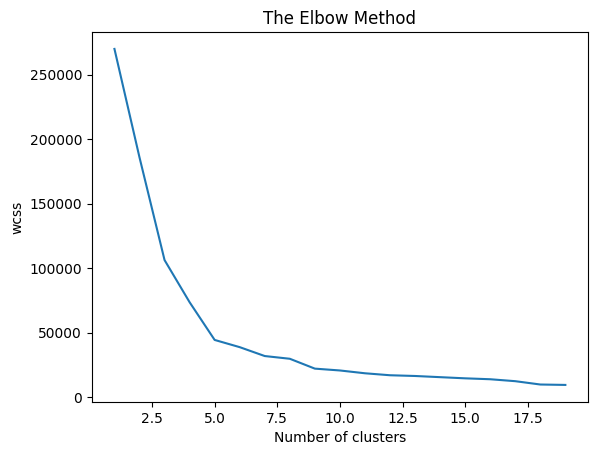

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, random_state=0,init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [15]:
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


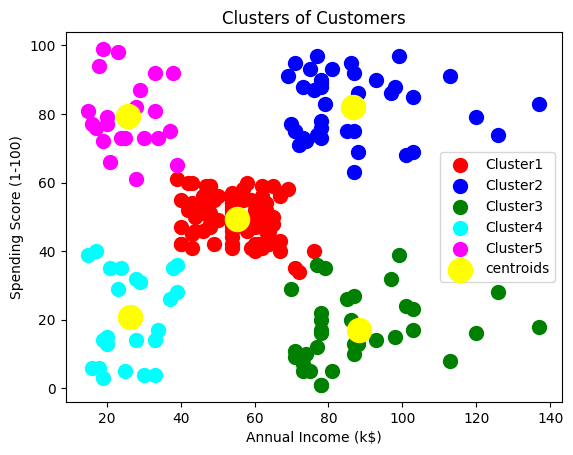

In [17]:
plt.scatter(X[y_kmeans == 0, 0],  X[y_kmeans == 0, 1], s=100, c='red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0],  X[y_kmeans == 1, 1], s=100, c='blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0],  X[y_kmeans == 2, 1], s=100, c='green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0],  X[y_kmeans == 3, 1], s=100, c='cyan', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0],  X[y_kmeans == 4, 1], s=100, c='magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'centroids')
plt.title("Clusters of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [18]:
# --- Cluster evaluation metrics (inertia already available as kmeans.inertia_)
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Basic stats
inertia = getattr(kmeans, 'inertia_', None)
labels = y_kmeans
n_clusters = len(np.unique(labels))
counts = np.bincount(labels)
centroids = kmeans.cluster_centers_

print(f'Inertia: {inertia}')
print(f'Number of clusters: {n_clusters}')
print('Cluster sizes:', dict(enumerate(counts)))

# External validation-style metrics (work only with >1 cluster and when samples>clusters)
try:
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    print(f'Silhouette Score: {sil:.4f}')
    print(f'Davies-Bouldin Index: {db:.4f} (lower is better)')
    print(f'Calinski-Harabasz Index: {ch:.4f} (higher is better)')
except Exception as e:
    print('Could not compute one or more cluster metrics:', e)

# Average distance of points to their assigned centroid (lower => tighter clusters)
distances = np.min(cdist(X, centroids, 'euclidean'), axis=1)
avg_dist = distances.mean()
print(f'Average distance to assigned centroid: {avg_dist:.4f}')

Inertia: 44448.45544793371
Number of clusters: 5
Cluster sizes: {0: np.int64(81), 1: np.int64(39), 2: np.int64(35), 3: np.int64(23), 4: np.int64(22)}
Silhouette Score: 0.5539
Davies-Bouldin Index: 0.5726 (lower is better)
Calinski-Harabasz Index: 247.3590 (higher is better)
Average distance to assigned centroid: 13.0201


### Inference example: predict new samples and plot
Below we show how to assign cluster labels to new samples and plot them on the existing scatter to visually inspect assignments. Replace the example points with your own data.

New samples predicted clusters: [4 2 0]


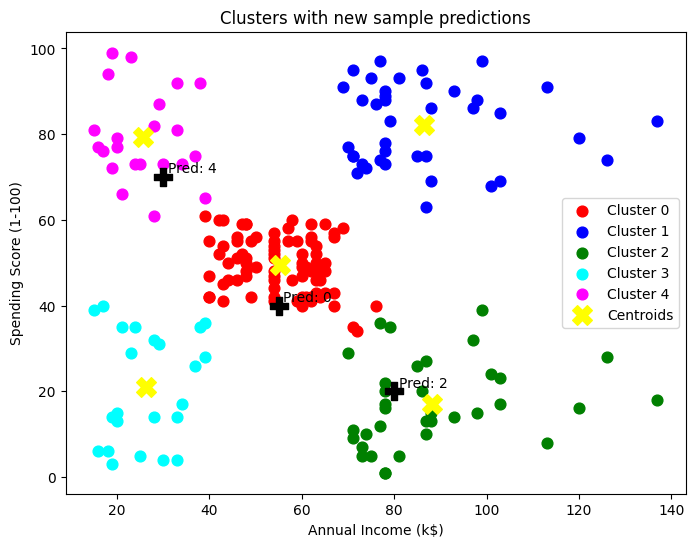

In [19]:
# Example new samples (Annual Income, Spending Score)
new_samples = np.array([[30, 70], [80, 20], [55, 40]])
preds = kmeans.predict(new_samples)
print('New samples predicted clusters:', preds)

# Plot existing clusters again and overlay new points
plt.figure(figsize=(8,6))
colors = ['red','blue','green','cyan','magenta']
for i in range(n_clusters):
    plt.scatter(X[labels==i,0], X[labels==i,1], s=60, c=colors[i%len(colors)], label=f'Cluster {i}')
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='yellow', marker='X', label='Centroids')
# new points
for pt, lab in zip(new_samples, preds):
    plt.scatter(pt[0], pt[1], s=180, c='black', marker='P')
    plt.text(pt[0]+1, pt[1]+1, f'Pred: {lab}', color='black')
plt.title('Clusters with new sample predictions')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Notes: accuracy and saving the model
Clustering is unsupervised, so there is no single 
 metric unless you have ground-truth labels to compare to. Use external labels (if available) and metrics like Adjusted Rand Index or Normalized Mutual Information to compare.
You can save the fitted KMeans object for later inference; below is an example using joblib.